## Rankings clasificación

**Adrián Arnaiz Rodríguez**

Realizaremos rankings de:
1. Experimentos con clasificadores con parámetros por defecto.

2. **TODO** Experimentos con clasificadores con búsqueda de parámetros y preprocesado (SKBest, VT...)
 * Definir pipelines (Pre+Clf)
 * Definir qué parámetros del pipeline serán optimizados.
 * Optimizar y sacar métricas con optimizado



**Clasificadores a utilizar-optimizar**
- Knn
- Tree
- Bayes
- SVM
- RandomF
- Ada
- GBC
- MLP

**Como optimizar clfs y pretratamiento de ccas**
- GS de parametros

# 1. Experimentos con sin preprocesado ni búsqueda de parámetros

In [134]:
algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"MLP10",
        "ALGO": "sklearn.neural_network.MLPClassifier",
        "PARAMS":{ "hidden_layer_sizes":10,
                  'max_iter':700,
        },
    },
    {
        "ID_ALG":"RF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RF4",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 'max_depth':4
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
]

In [135]:
import bunch_loader as loader

In [138]:
from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import importlib
import warnings
warnings.filterwarnings('ignore')

def run_experiments(modulo, modelos, n_cv=10, verbose=False):
    aucs = dict()
    accuracys = dict()
    
    datasets_loaders = [d for d in dir(modulo) if d.startswith('load')]
    for dtst in datasets_loaders:
        aucs[dtst[5:]]={}
        accuracys[dtst[5:]]={}
        data_bunch = getattr(modulo, dtst)()
        X = data_bunch['data']
        y = data_bunch['target']
        if verbose: print('---------\n',dtst)
        
        
        for clf in modelos:
            #Cargamos el modelo de manera dinámica
            metodo = clf['ALGO']
            puntos = [pos for pos, char in enumerate(metodo) if char == "."]
            libreria = importlib.import_module(metodo[:puntos[-1]]) #nombre del modulo
            clase = getattr(libreria, metodo[puntos[-1]+1:]) #nombre de la clase
            
            #Creamos y ejecutamos el pipeline de clasificacion
            skf = StratifiedKFold(n_splits=10)
            pip = Pipeline([('norm', MinMaxScaler()),('clf', clase(**clf["PARAMS"]))])
            cv_res = cross_validate(pip,
                                    X,y,
                                    cv=StratifiedKFold(n_splits=n_cv), 
                                    scoring = {'AUC':'roc_auc', 'ACCURACY':'accuracy'}, 
                                    return_train_score=False)
            
            # Guardamos resultados
            aucs[dtst[5:]][clf['ID_ALG']] = cv_res['test_AUC'].mean()
            accuracys[dtst[5:]][clf['ID_ALG']] = cv_res['test_ACCURACY'].mean()
            
            #cv_res
            if verbose:
                print(metodo)
                print('\tAUC: {:.4f} +- {:.2f}'.format(cv_res['test_AUC'].mean(), cv_res['test_AUC'].std()), end = '||')
                print('ACCURACY: {:.4f} +- {:.2f}'.format(cv_res['test_ACCURACY'].mean(), cv_res['test_ACCURACY'].std()))
        
    return aucs, accuracys


In [139]:
auc_res, accuracys_res = run_experiments(loader, algoritmos, 10, verbose=False)

C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization h

C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.

C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Usuario\.conda\envs\pk\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (700) reached and the optimization hasn't converged yet.

In [273]:
clf_bin_auc_default = pd.DataFrame(auc_res).transpose()
clf_bin_auc_default.to_csv('resultados/bin_clf_auc_default.csv', header=True, index_label='Dataset')

In [274]:
clf_bin_auc_default = pd.read_csv('resultados/bin_clf_auc_default.csv')
clf_bin_auc_default

,Dataset,KNN8,Tree,MLP10,RF,RF4,SVM,Bayes,GBC,Ada
0,art_rt,0.666000,0.560000,0.708000,0.746000,0.682000,0.760000,0.694000,0.724000,0.784000
1,art_w_atleta,0.646000,0.540000,0.644000,0.630000,0.708000,0.684000,0.638000,0.696000,0.732000
2,art_w_braso,0.590000,0.580000,0.600000,0.634000,0.612000,0.676000,0.692000,0.656000,0.544000
3,art_w_campana,0.638000,0.590000,0.508000,0.666000,0.668000,0.700000,0.678000,0.676000,0.708000
4,art_w_gato,0.706000,0.530000,0.668000,0.760000,0.618000,0.676000,0.672000,0.708000,0.632000
5,art_w_petaka,0.594000,0.580000,0.604000,0.668000,0.712000,0.708000,0.716000,0.688000,0.632000
6,fon_rt,0.522000,0.570000,0.492000,0.558000,0.680000,0.444000,0.588000,0.668000,0.840000
7,fon_v_A,0.611333,0.606667,0.685333,0.658667,0.726667,0.685778,0.681778,0.695556,0.654222
8,fon_v_E,0.620444,0.596667,0.740889,0.673333,0.711778,0.703111,0.715778,0.688444,0.651111
9,fon_v_I,0.640889,0.610000,0.706667,0.635556,0.717333,0.676889,0.668000,0.680444,0.625333


Maximos por clasificador:

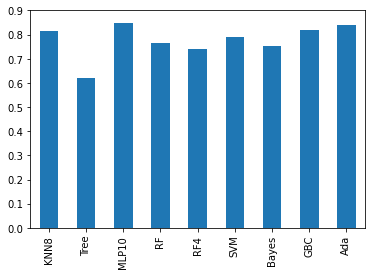

In [275]:
clf_bin_auc_default.drop('Dataset', axis=1).max(axis=0).plot(kind='bar', ylim=[0,0.9])

Medias por clasificador

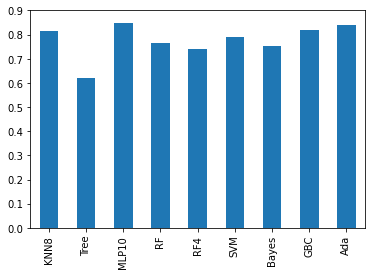

In [276]:
clf_bin_auc_default.drop('Dataset', axis=1).max(axis=0).plot(kind='bar', ylim=[0,0.9])

Medias y varianza por dataset

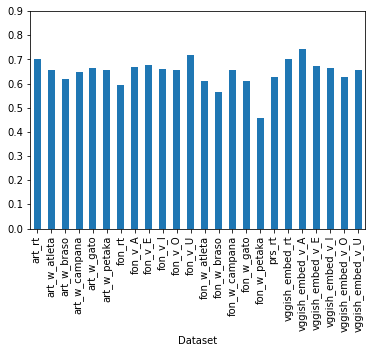

In [277]:
clf_bin_auc_default.set_index('Dataset').mean(axis=1).plot(kind='bar',ylim=[0,0.9])

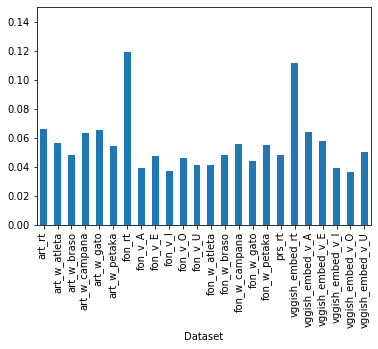

In [278]:
clf_bin_auc_default.set_index('Dataset').std(axis=1).plot(kind='bar',ylim=[0,0.15])

In [279]:
import my_posthoc.post_hoc as ph

In [280]:
df_Hoch, avg_rank = ph.posthoc_Friedman_Davenport_Hochbertest(clf_bin_auc_default_D) 

### Experimento
# Number of classifiers: 9
# Number of datasets: 24
# Name of classifiers: KNN8, Tree, MLP10, RF, RF4, SVM, Bayes, GBC, Ada
# Alpha: 0.05

### Métricas
# Test de Friedman sobre métricas 
	-> p-val: 0.0000

### Rankings
# GBC   ranking medio:  3.125
# RF4   ranking medio:  4.0
# MLP10 ranking medio:  4.208
# SVM   ranking medio:  4.5
# Bayes ranking medio:  4.875
# Ada   ranking medio:  4.917
# RF    ranking medio:  5.458
# KNN8  ranking medio:  5.542
# Tree  ranking medio:  8.375
# Test de Ivan-Davenport sobre Rankings [F(9.3253, 8, 184)]               
	-> p-val: 0.0000

### Test Hochberg Comparacion GBC vs all
# Tabla de comparación de Rankings:
                  z      p  alpha/i    sig
GBC vs Tree   6.641  0.000    0.006   True
GBC vs KNN8   3.057  0.002    0.007   True
GBC vs RF     2.951  0.003    0.008   True
GBC vs Ada    2.267  0.023    0.010  False
GBC vs Bayes  2.214  0.027    0.012  False
GBC vs SVM    1.739  0.082    0.017  False
GBC vs MLP10  1.370  0.171 

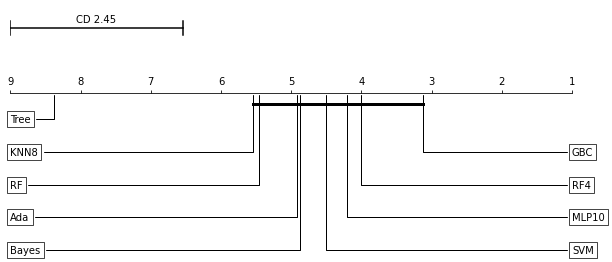

[['KNN8', 'RF', 'Ada', 'Bayes', 'SVM', 'MLP10', 'RF4', 'GBC']]

In [281]:
n_dt = clf_bin_auc_default.shape[0]
n_clf = clf_bin_auc_default.shape[1]-1 #Columna de datasets
g = ph.groups_Nemenyi(avg_rank, ph.nemenyi_CD(n_clf, n_dt, alpha=0.05))
ph.plot_nemenyi(avg_rank,ph.nemenyi_CD(n_clf, n_dt, alpha=0.05),g)
g

In [282]:
avg_rank

{'KNN8': 5.542,
 'Tree': 8.375,
 'MLP10': 4.208,
 'RF': 5.458,
 'RF4': 4.0,
 'SVM': 4.5,
 'Bayes': 4.875,
 'GBC': 3.125,
 'Ada': 4.917}

***Accuracy***

In [283]:
clf_bin_accuracy_default = pd.DataFrame(accuracys_res).transpose()
clf_bin_accuracy_default.to_csv('resultados/bin_clf_accuracy_default.csv', header=True, index_label='Dataset')
clf_bin_accuracy_default = pd.read_csv('resultados/bin_clf_accuracy_default.csv')
clf_bin_accuracy_default

,Dataset,KNN8,Tree,MLP10,RF,RF4,SVM,Bayes,GBC,Ada
0,art_rt,0.600000,0.560000,0.610000,0.640000,0.680000,0.620000,0.660000,0.700000,0.700000
1,art_w_atleta,0.630000,0.540000,0.600000,0.600000,0.630000,0.560000,0.590000,0.620000,0.630000
2,art_w_braso,0.530000,0.580000,0.590000,0.560000,0.530000,0.610000,0.640000,0.620000,0.530000
3,art_w_campana,0.580000,0.590000,0.550000,0.590000,0.590000,0.570000,0.640000,0.610000,0.650000
4,art_w_gato,0.670000,0.530000,0.580000,0.720000,0.590000,0.630000,0.640000,0.620000,0.600000
5,art_w_petaka,0.570000,0.580000,0.630000,0.600000,0.640000,0.590000,0.650000,0.670000,0.620000
6,fon_rt,0.550000,0.570000,0.490000,0.550000,0.560000,0.540000,0.590000,0.630000,0.760000
7,fon_v_A,0.583333,0.606667,0.636667,0.593333,0.660000,0.640000,0.636667,0.653333,0.646667
8,fon_v_E,0.610000,0.596667,0.663333,0.613333,0.650000,0.646667,0.646667,0.636667,0.616667
9,fon_v_I,0.603333,0.610000,0.640000,0.576667,0.643333,0.630000,0.630000,0.636667,0.600000


In [284]:
clf_bin_accuracy_default.mean()

KNN8     0.599941
Tree     0.565034
MLP10    0.622351
RF       0.594205
RF4      0.611497
SVM      0.590014
Bayes    0.608521
GBC      0.640418
Ada      0.619496
dtype: float64

In [285]:
clf_bin_accuracy_default.drop('Dataset', axis=1).max()

KNN8     0.700000
Tree     0.620000
MLP10    0.770000
RF       0.720000
RF4      0.696667
SVM      0.680000
Bayes    0.660000
GBC      0.760000
Ada      0.760000
dtype: float64

Post-hoc

In [286]:
df, avg_r = ph.posthoc_Friedman_Davenport_Hochbertest(clf_bin_accuracy_default) 

### Experimento
# Number of classifiers: 9
# Number of datasets: 24
# Name of classifiers: KNN8, Tree, MLP10, RF, RF4, SVM, Bayes, GBC, Ada
# Alpha: 0.05

### Métricas
# Test de Friedman sobre métricas 
	-> p-val: 0.0000

### Rankings
# GBC   ranking medio:  2.792
# MLP10 ranking medio:  3.917
# RF4   ranking medio:  3.938
# Ada   ranking medio:  4.438
# Bayes ranking medio:  4.771
# KNN8  ranking medio:  5.646
# SVM   ranking medio:  5.958
# RF    ranking medio:  6.208
# Tree  ranking medio:  7.333
# Test de Ivan-Davenport sobre Rankings [F(8.2134, 8, 184)]               
	-> p-val: 0.0000

### Test Hochberg Comparacion GBC vs all
# Tabla de comparación de Rankings:
                  z      p  alpha/i    sig
GBC vs Tree   5.744  0.000    0.006   True
GBC vs RF     4.321  0.000    0.007   True
GBC vs SVM    4.005  0.000    0.008   True
GBC vs KNN8   3.610  0.000    0.010   True
GBC vs Bayes  2.503  0.012    0.012   True
GBC vs Ada    2.082  0.037    0.017  False
GBC vs RF4    1.450  0.

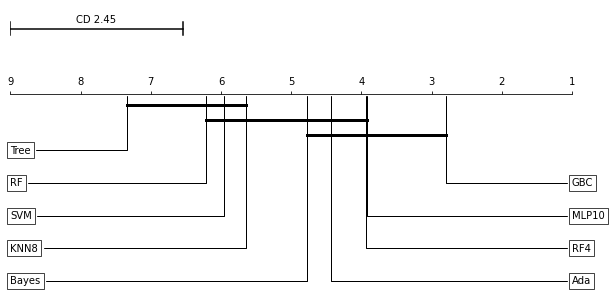

[['Tree', 'RF', 'SVM', 'KNN8'],
 ['RF', 'SVM', 'KNN8', 'Bayes', 'Ada', 'RF4', 'MLP10'],
 ['Bayes', 'Ada', 'RF4', 'MLP10', 'GBC']]

In [287]:
g = ph.groups_Nemenyi(avg_r, ph.nemenyi_CD(n_clf, n_dt, alpha=0.05))
ph.plot_nemenyi(avg_r,ph.nemenyi_CD(n_clf, n_dt, alpha=0.05),g)
g

# 2. Clasificadores optimizados: TODO

In [288]:
df

,z,p,alpha/i,sig
GBC vs Tree,5.744,0.000,0.006,True
GBC vs RF,4.321,0.000,0.007,True
GBC vs SVM,4.005,0.000,0.008,True
GBC vs KNN8,3.610,0.000,0.010,True
GBC vs Bayes,2.503,0.012,0.012,True
GBC vs Ada,2.082,0.037,0.017,False
GBC vs RF4,1.450,0.147,0.025,False
GBC vs MLP10,1.423,0.155,0.050,False
